# K-Means Clustering
Tahapan :
   1. Konversi data menjadi Dataframe.
   2. Lakukan preprocessing data.
   3. Hilangkan kolom 'CustomerID' dan 'gender'.
   4. Latih model K-Means.
   5. Buat plot untuk Elbow dan Cluster.

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1f4d4c4de89540c5b91283c1fbf2e8e1 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1f4d4c4de89540c5b91283c1fbf2e8e1 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1f4d4c4de89540c5b91283c1fbf2e8e1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dDuT9Y7UtbO9-WmawNyBuALgL4gYUI6T2MuRzIvMcRxJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1f4d4c4de89540c5b91283c1fbf2e8e1)

body = client_1f4d4c4de89540c5b91283c1fbf2e8e1.get_object(Bucket='latihanwatsonstudio-donotdelete-pr-o35aesrtn21y0t',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df = df_data_1

In [3]:
# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [5]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inersia untuk menentukan jumlah K (cluster)
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

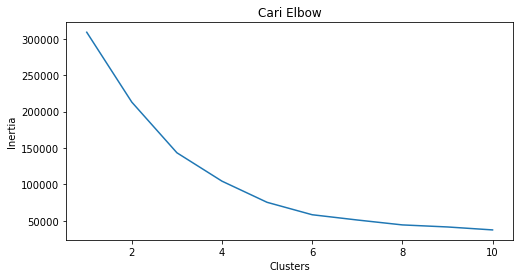

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia untuk mengetahui elbow untuk menentukan jumlah K
# dalam kasus ini elbow ada di 5
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

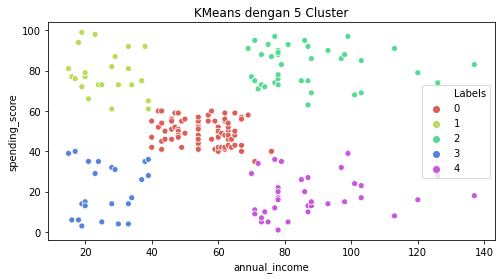

In [7]:
# membuat objek KMeans dengan K = 5 (lihat elbow)
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()